## Genel Analiz Santraller İçin

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dosya yollarını belirle
dosya_yollari = {
    "Teknecik": "Daily_NO2_Teknecik_2019_202501.csv",
    "Kalecik": "Daily_NO2_Kalecik_2019_202501.csv"
}

In [31]:
def veriyi_yukle_ve_isle(dosya_yolu):
    """Veriyi yükler, tarihe göre gruplayıp ortalama NO2 değerini hesaplar."""
    df = pd.read_csv(dosya_yolu)
    df['date'] = pd.to_datetime(df['date'])
    df_ortalama = df.groupby('date').mean()
    return df_ortalama

def temel_istatistikler(df, bolge_adi):
    """Temel istatistikleri hesaplar ve yazdırır."""
    ortalama = df['NO2_value'].mean()
    standart_sapma = df['NO2_value'].std()
    minimum = df['NO2_value'].min()
    maksimum = df['NO2_value'].max()

    print(f"\n{bolge_adi} Bölgesi İçin İstatistikler:")
    print(f"  Ortalama NO2: {ortalama:.2e}")
    print(f"  Standart Sapma: {standart_sapma:.2e}")
    print(f"  Minimum NO2: {minimum:.2e}")
    print(f"  Maksimum NO2: {maksimum:.2e}")

def aylik_trendler(df, bolge_adi):
    """Aylık trendleri hesaplar ve grafikler."""
    df_aylik = df.groupby(df.index.month).mean()
    plt.figure(figsize=(8, 4))
    plt.plot(df_aylik.index, df_aylik['NO2_value'], marker='o')
    plt.title(f'{bolge_adi} Bölgesi Aylık Ortalama NO2 Trendleri')
    plt.xlabel('Ay')
    plt.ylabel('Ortalama NO2 Değeri')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

def yillik_trendler(df, bolge_adi):
    """Yıllık trendleri hesaplar ve grafikler."""
    df_yillik = df.groupby(df.index.year).mean()
    plt.figure(figsize=(8, 4))
    plt.plot(df_yillik.index, df_yillik['NO2_value'], marker='o')
    plt.title(f'{bolge_adi} Bölgesi Yıllık Ortalama NO2 Trendleri')
    plt.xlabel('Yıl')
    plt.ylabel('Ortalama NO2 Değeri')
    plt.grid(True)
    plt.show()



Analiz Başlatılıyor: Teknecik Bölgesi

Teknecik Bölgesi İçin İstatistikler:
  Ortalama NO2: 8.22e-05
  Standart Sapma: 2.09e-05
  Minimum NO2: 1.00e-06
  Maksimum NO2: 3.16e-04


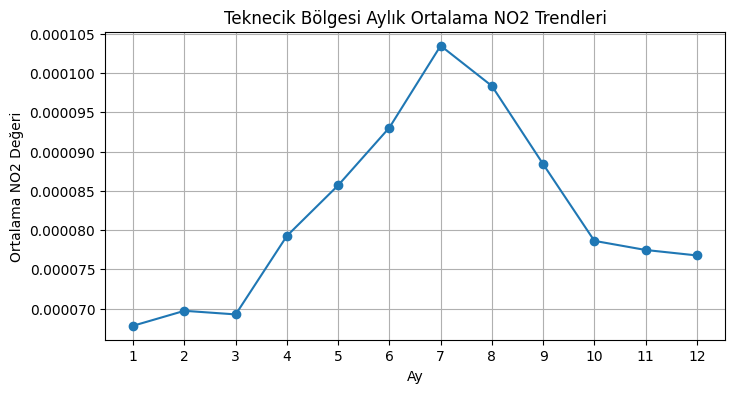

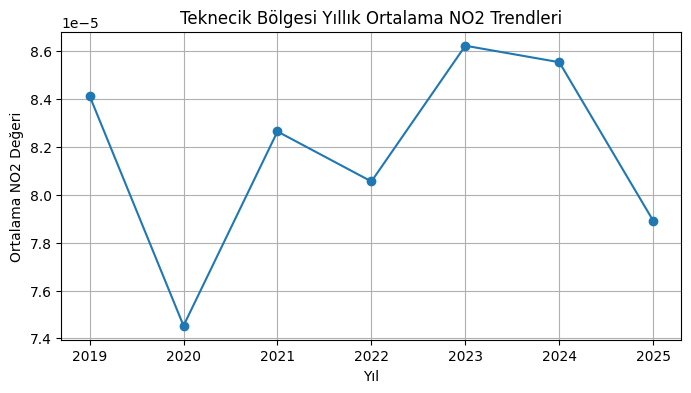

   **UYARI:** Teknecik bölgesinde ortalama NO2 seviyesi WHO limitini aşıyor. 
Analiz Başlatılıyor: Kalecik Bölgesi

Kalecik Bölgesi İçin İstatistikler:
  Ortalama NO2: 8.95e-05
  Standart Sapma: 2.88e-05
  Minimum NO2: 2.28e-05
  Maksimum NO2: 3.35e-04


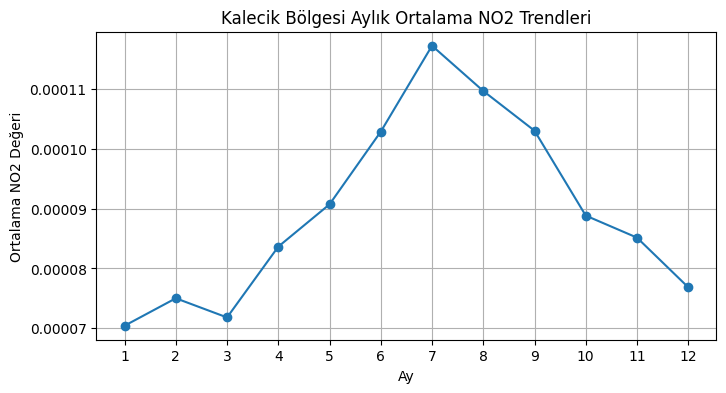

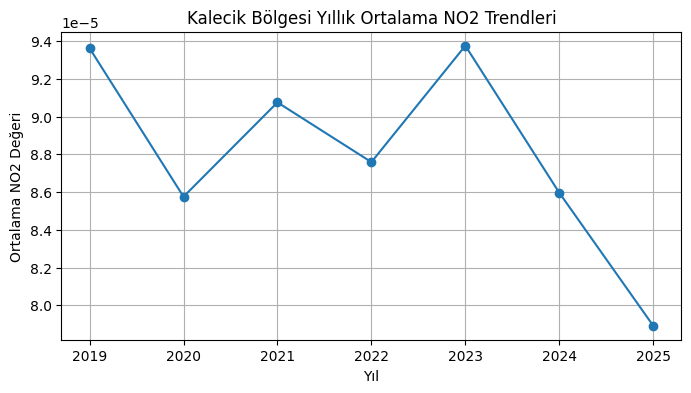

   **UYARI:** Kalecik bölgesinde ortalama NO2 seviyesi WHO limitini aşıyor. 


In [32]:
# Analiz Döngüsü
for bolge_adi, dosya_yolu in dosya_yollari.items():
    print(f"Analiz Başlatılıyor: {bolge_adi} Bölgesi")
    df_ortalama = veriyi_yukle_ve_isle(dosya_yolu)
    temel_istatistikler(df_ortalama, bolge_adi)
    aylik_trendler(df_ortalama, bolge_adi)
    yillik_trendler(df_ortalama, bolge_adi)

    # WHO standartlarıyla karşılaştırma
    who_limit = 25e-6  # WHO'nun yıllık ortalama NO2 limiti (µg/m³)
    ortalama_no2 = df_ortalama['NO2_value'].mean()
    if ortalama_no2 > who_limit:
        print(f"   **UYARI:** {bolge_adi} bölgesinde ortalama NO2 seviyesi WHO limitini aşıyor. ")
    else:
       print(f"    {bolge_adi} bölgesinde ortalama NO2 seviyesi WHO limitinin altında.")

## Teknecik Santrali Analizi

### Günlük Varyans Analizi

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def veriyi_yukle_ve_isle(dosya_yolu):
    """Veriyi yükler, tarihe göre gruplayıp ortalama NO2 değerini hesaplar."""
    df = pd.read_csv(dosya_yolu)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    return df

def histogram_ciz(df, bolge_adi):
  plt.figure(figsize=(10,6))
  plt.hist(df['NO2_value'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'{bolge_adi} Günlük NO2 Değerleri Dağılımı')
  plt.xlabel('NO2 Değeri')
  plt.ylabel('Frekans')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

def esik_asimi_hesapla(df, esik_degeri):
    """Belirli bir eşiği aşan gün sayısını hesaplar."""
    esik_asimi_sayisi = (df['NO2_value'] > esik_degeri).sum()
    print(f"   Belirtilen eşiği ({esik_degeri:.2e}) aşan gün sayısı: {esik_asimi_sayisi}")

def zaman_serisi_grafik(df, bolge_adi):
  """Günlük değerleri zaman serisi olarak çizer."""
  plt.figure(figsize=(15,6))
  plt.plot(df.index, df['NO2_value'], marker='.', linestyle='-', color='purple')
  plt.title(f'{bolge_adi} Bölgesi Günlük NO2 Değerleri Zaman Serisi')
  plt.xlabel('Tarih')
  plt.ylabel('NO2 Değeri')
  plt.grid(True)
  plt.show()


Teknecik Bölgesi Günlük Varyasyon Analizi:


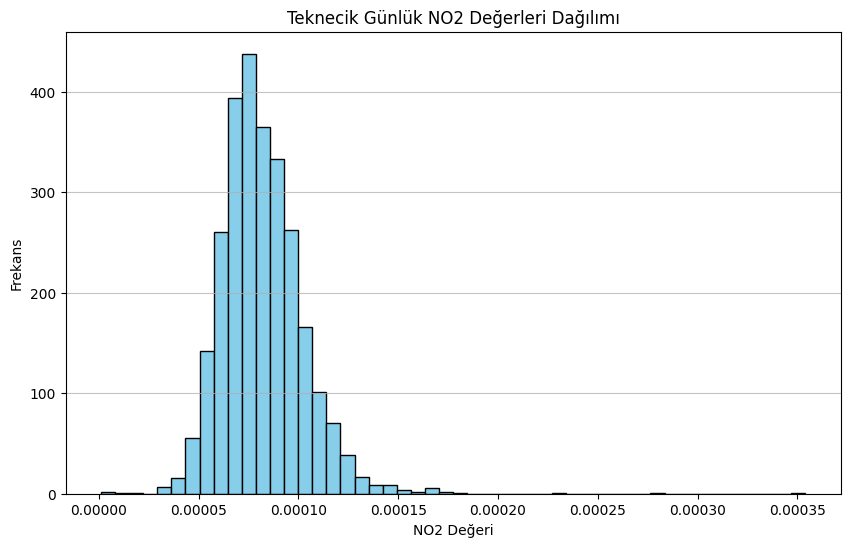

   Belirtilen eşiği (2.00e-04) aşan gün sayısı: 3
   Belirtilen eşiği (1.00e-04) aşan gün sayısı: 411


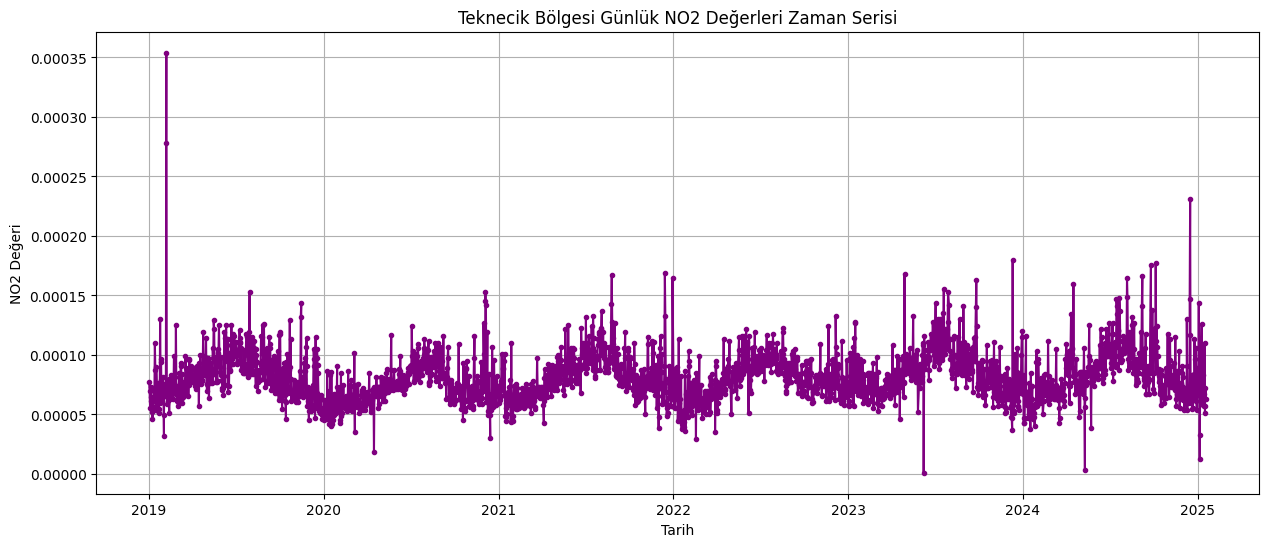

In [35]:
# Analiz Başlat
dosya_yolu = "Daily_NO2_Teknecik_2019_202501.csv"
bolge_adi = "Teknecik"
df = veriyi_yukle_ve_isle(dosya_yolu)


print(f"\n{bolge_adi} Bölgesi Günlük Varyasyon Analizi:")
histogram_ciz(df, bolge_adi)

esik_degeri_1 = 200e-6 # WHO 1 saatlik ortalama limiti.
esik_asimi_hesapla(df, esik_degeri_1)

esik_degeri_2 = 100e-6
esik_asimi_hesapla(df, esik_degeri_2)

zaman_serisi_grafik(df, bolge_adi)

### Haftalık ve Haftanın Gününe Göre

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def veriyi_yukle_ve_isle(dosya_yolu):
    """Veriyi yükler, tarihe göre gruplayıp ortalama NO2 değerini hesaplar."""
    df = pd.read_csv(dosya_yolu)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    return df

def mevsimsel_analiz(df, bolge_adi):
  """Mevsimsel ortalamaları hesaplar ve grafikler."""
  df_mevsim = df.copy()
  df_mevsim['Mevsim'] = df_mevsim.index.to_period('Q').strftime('%Y-%q')

  df_mevsim = df_mevsim.groupby('Mevsim').agg({'NO2_value':['mean', 'std','min','max']})
  print(f'\n{bolge_adi} Bölgesi Mevsimsel NO2 İstatistikleri:')
  print(df_mevsim)
  df_mevsim.plot(kind='bar',figsize=(10,6))
  plt.title(f'{bolge_adi} Bölgesi Mevsimsel Ortalama NO2 Değerleri')
  plt.xlabel('Mevsim (Yıl-Çeyrek)')
  plt.ylabel('NO2 Değeri')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

def haftanin_gunleri_analiz(df, bolge_adi):
    """Haftanın günlerine göre ortalama NO2 değerlerini hesaplar ve grafikler."""
    df_gunler = df.copy()
    df_gunler['Haftanın Günü'] = df_gunler.index.day_name()
    df_gunler = df_gunler.groupby('Haftanın Günü').mean().sort_values('NO2_value',ascending=False)

    print(f'\n{bolge_adi} Bölgesi Haftanın Günlerine Göre Ortalama NO2 Değerleri:')
    print(df_gunler)

    plt.figure(figsize=(10, 6))
    plt.bar(df_gunler.index, df_gunler['NO2_value'], color='coral')
    plt.title(f'{bolge_adi} Bölgesi Haftanın Günlerine Göre Ortalama NO2 Değerleri')
    plt.xlabel('Haftanın Günü')
    plt.ylabel('Ortalama NO2 Değeri')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def aykiri_deger_analizi(df, bolge_adi):
    """Aykırı değerleri tespit eder ve gösterir."""
    q1 = df['NO2_value'].quantile(0.25)
    q3 = df['NO2_value'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    aykiri_degerler = df[(df['NO2_value'] < lower_bound) | (df['NO2_value'] > upper_bound)]
    print(f'\n{bolge_adi} Bölgesi Aykırı NO2 Değerleri (IQR yöntemi ile):')
    print(aykiri_degerler)

    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df['NO2_value'], label='Normal Değerler', s=10, color = "skyblue")
    plt.scatter(aykiri_degerler.index, aykiri_degerler['NO2_value'], label='Aykırı Değerler', color='red', s=20)
    plt.title(f'{bolge_adi} Bölgesi NO2 Değerleri (Aykırı Değerler İşaretli)')
    plt.xlabel('Tarih')
    plt.ylabel('NO2 Değeri')
    plt.legend()
    plt.grid(True)
    plt.show()



Teknecik Bölgesi Mevsimsel NO2 İstatistikleri:
       NO2_value                              
            mean       std       min       max
Mevsim                                        
2019-1  0.000077  0.000036  0.000032  0.000354
2019-2  0.000090  0.000015  0.000057  0.000129
2019-3  0.000094  0.000015  0.000062  0.000153
2019-4  0.000074  0.000019  0.000045  0.000144
2020-1  0.000061  0.000011  0.000035  0.000102
2020-2  0.000074  0.000011  0.000018  0.000117
2020-3  0.000088  0.000013  0.000058  0.000124
2020-4  0.000073  0.000019  0.000031  0.000153
2021-1  0.000066  0.000012  0.000044  0.000110
2021-2  0.000085  0.000014  0.000042  0.000125
2021-3  0.000098  0.000016  0.000070  0.000167
2021-4  0.000079  0.000020  0.000039  0.000169
2022-1  0.000066  0.000015  0.000029  0.000113
2022-2  0.000085  0.000015  0.000050  0.000122
2022-3  0.000091  0.000012  0.000065  0.000123
2022-4  0.000078  0.000013  0.000058  0.000133
2023-1  0.000075  0.000014  0.000053  0.000128
2023-2  0.00

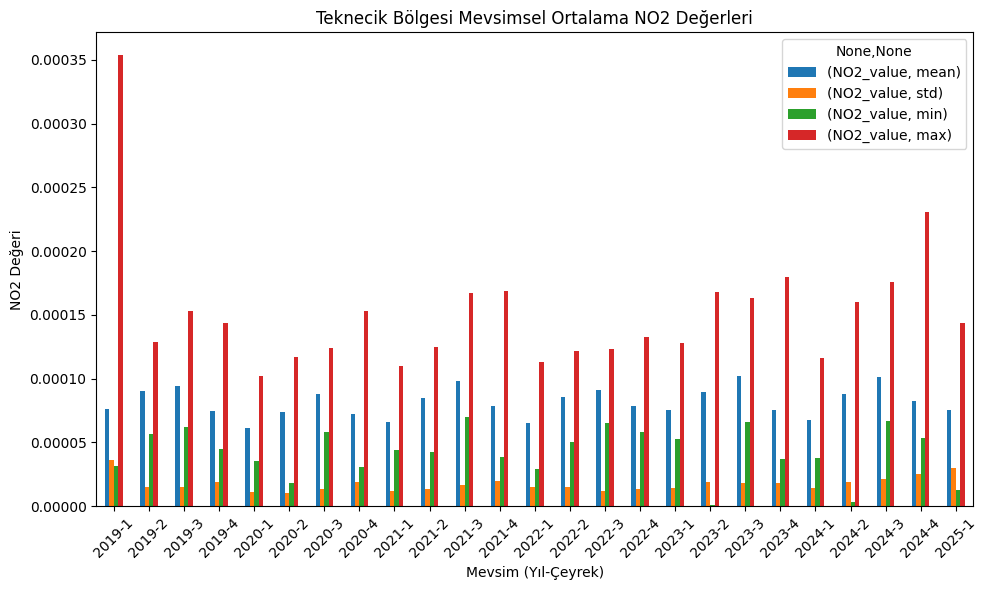


Teknecik Bölgesi Haftanın Günlerine Göre Ortalama NO2 Değerleri:
               NO2_value
Haftanın Günü           
Wednesday       0.000084
Tuesday         0.000083
Friday          0.000082
Thursday        0.000082
Monday          0.000082
Saturday        0.000081
Sunday          0.000077


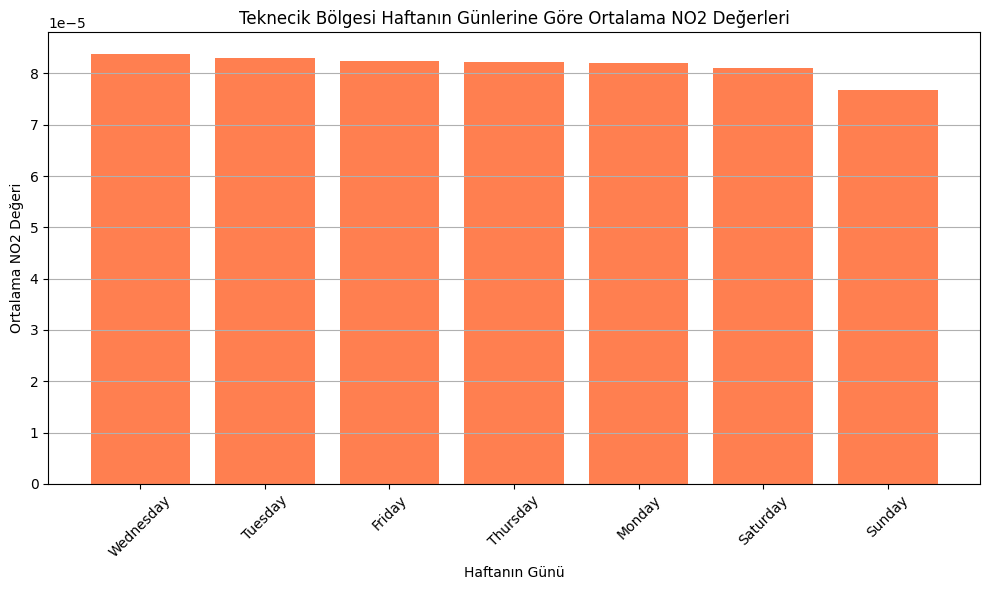


Teknecik Bölgesi Aykırı NO2 Değerleri (IQR yöntemi ile):
            NO2_value
date                 
2019-02-06   0.000354
2019-02-06   0.000278
2019-07-30   0.000153
2019-11-14   0.000132
2019-11-15   0.000144
2020-04-15   0.000018
2020-12-04   0.000153
2020-12-04   0.000145
2020-12-05   0.000142
2021-07-02   0.000132
2021-07-17   0.000133
2021-08-04   0.000137
2021-08-24   0.000143
2021-08-25   0.000167
2021-12-14   0.000169
2021-12-15   0.000133
2021-12-30   0.000165
2022-02-17   0.000029
2022-12-06   0.000133
2023-04-29   0.000168
2023-05-17   0.000133
2023-06-08   0.000001
2023-07-03   0.000144
2023-07-18   0.000135
2023-07-20   0.000155
2023-07-29   0.000153
2023-07-31   0.000142
2023-08-30   0.000141
2023-09-25   0.000140
2023-09-26   0.000163
2023-12-11   0.000180
2024-04-11   0.000134
2024-04-16   0.000160
2024-05-10   0.000003
2024-07-15   0.000147
2024-07-16   0.000141
2024-07-17   0.000134
2024-07-21   0.000148
2024-07-22   0.000137
2024-08-06   0.000165
2024-08-07   0.000

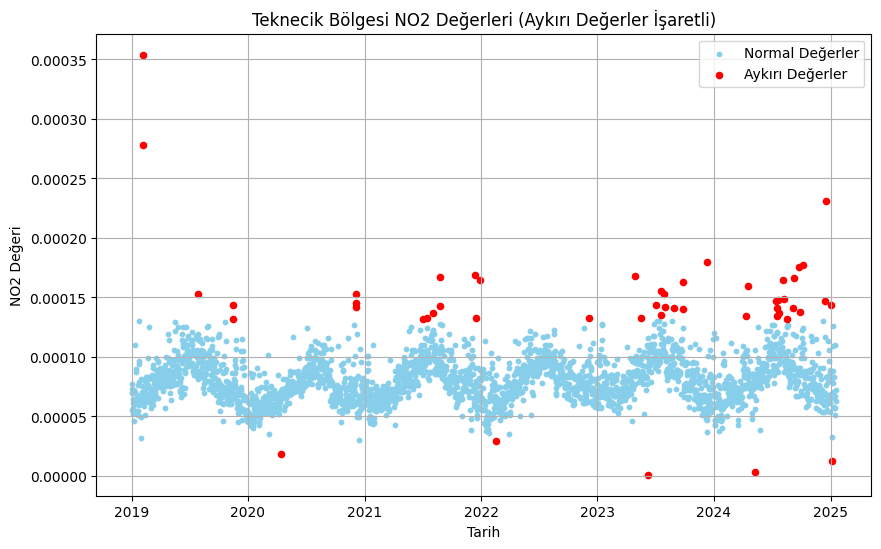

In [37]:
# Analiz Başlat
dosya_yolu = "Daily_NO2_Teknecik_2019_202501.csv"
bolge_adi = "Teknecik"
df = veriyi_yukle_ve_isle(dosya_yolu)

mevsimsel_analiz(df, bolge_adi)
haftanin_gunleri_analiz(df, bolge_adi)
aykiri_deger_analizi(df, bolge_adi)

## KALECİK SANTRALİ Analizi

### Günlük Varyans Analizi

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def veriyi_yukle_ve_isle(dosya_yolu):
    """Veriyi yükler, tarihe göre gruplayıp ortalama NO2 değerini hesaplar."""
    df = pd.read_csv(dosya_yolu)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    return df

def histogram_ciz(df, bolge_adi):
  plt.figure(figsize=(10,6))
  plt.hist(df['NO2_value'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'{bolge_adi} Günlük NO2 Değerleri Dağılımı')
  plt.xlabel('NO2 Değeri')
  plt.ylabel('Frekans')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

def esik_asimi_hesapla(df, esik_degeri):
    """Belirli bir eşiği aşan gün sayısını hesaplar."""
    esik_asimi_sayisi = (df['NO2_value'] > esik_degeri).sum()
    print(f"   Belirtilen eşiği ({esik_degeri:.2e}) aşan gün sayısı: {esik_asimi_sayisi}")

def zaman_serisi_grafik(df, bolge_adi):
  """Günlük değerleri zaman serisi olarak çizer."""
  plt.figure(figsize=(15,6))
  plt.plot(df.index, df['NO2_value'], marker='.', linestyle='-', color='purple')
  plt.title(f'{bolge_adi} Bölgesi Günlük NO2 Değerleri Zaman Serisi')
  plt.xlabel('Tarih')
  plt.ylabel('NO2 Değeri')
  plt.grid(True)
  plt.show()


Kalecik Bölgesi Günlük Varyasyon Analizi:


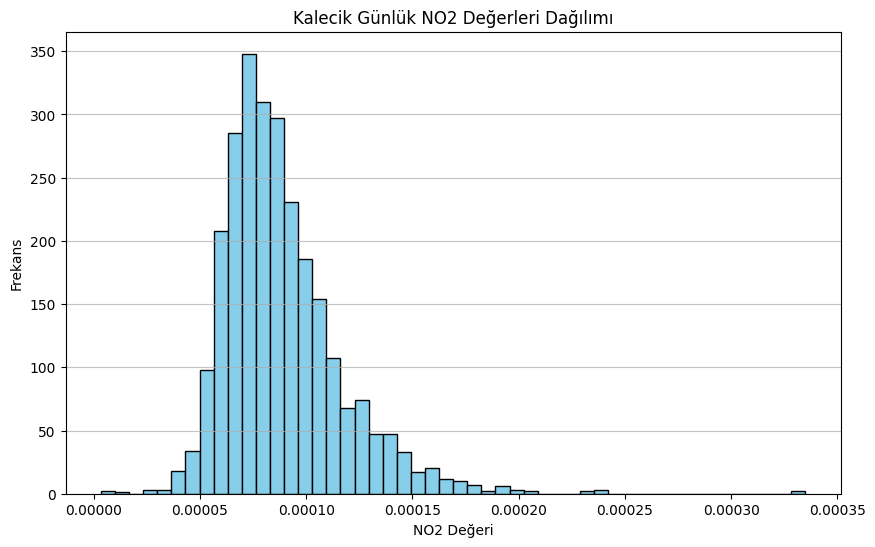

   Belirtilen eşiği (2.00e-04) aşan gün sayısı: 9
   Belirtilen eşiği (1.00e-04) aşan gün sayısı: 670


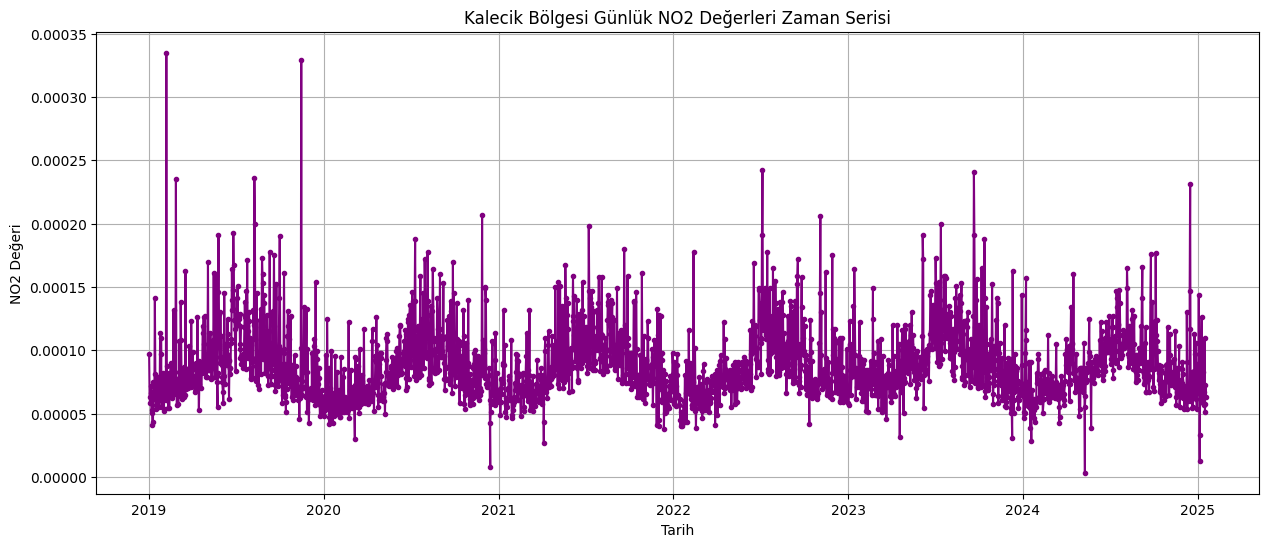

In [39]:
# Analiz Başlat
dosya_yolu = "Daily_NO2_Kalecik_2019_202501.csv"
bolge_adi = "Kalecik"
df = veriyi_yukle_ve_isle(dosya_yolu)

print(f"\n{bolge_adi} Bölgesi Günlük Varyasyon Analizi:")
histogram_ciz(df, bolge_adi)

esik_degeri_1 = 200e-6 # WHO 1 saatlik ortalama limiti.
esik_asimi_hesapla(df, esik_degeri_1)

esik_degeri_2 = 100e-6
esik_asimi_hesapla(df, esik_degeri_2)

zaman_serisi_grafik(df, bolge_adi)

### Mevsimsel ve Haftanın Günü Analizi

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def veriyi_yukle_ve_isle(dosya_yolu):
    """Veriyi yükler, tarihe göre gruplayıp ortalama NO2 değerini hesaplar."""
    df = pd.read_csv(dosya_yolu)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    return df

def mevsimsel_analiz(df, bolge_adi):
  """Mevsimsel ortalamaları hesaplar ve grafikler."""
  df_mevsim = df.copy()
  df_mevsim['Mevsim'] = df_mevsim.index.to_period('Q').strftime('%Y-%q')

  df_mevsim = df_mevsim.groupby('Mevsim').agg({'NO2_value':['mean', 'std','min','max']})
  print(f'\n{bolge_adi} Bölgesi Mevsimsel NO2 İstatistikleri:')
  print(df_mevsim)
  df_mevsim.plot(kind='bar',figsize=(10,6))
  plt.title(f'{bolge_adi} Bölgesi Mevsimsel Ortalama NO2 Değerleri')
  plt.xlabel('Mevsim (Yıl-Çeyrek)')
  plt.ylabel('NO2 Değeri')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

def haftanin_gunleri_analiz(df, bolge_adi):
    """Haftanın günlerine göre ortalama NO2 değerlerini hesaplar ve grafikler."""
    df_gunler = df.copy()
    df_gunler['Haftanın Günü'] = df_gunler.index.day_name()
    df_gunler = df_gunler.groupby('Haftanın Günü').mean().sort_values('NO2_value',ascending=False)

    print(f'\n{bolge_adi} Bölgesi Haftanın Günlerine Göre Ortalama NO2 Değerleri:')
    print(df_gunler)

    plt.figure(figsize=(10, 6))
    plt.bar(df_gunler.index, df_gunler['NO2_value'], color='coral')
    plt.title(f'{bolge_adi} Bölgesi Haftanın Günlerine Göre Ortalama NO2 Değerleri')
    plt.xlabel('Haftanın Günü')
    plt.ylabel('Ortalama NO2 Değeri')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def aykiri_deger_analizi(df, bolge_adi):
    """Aykırı değerleri tespit eder ve gösterir."""
    q1 = df['NO2_value'].quantile(0.25)
    q3 = df['NO2_value'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    aykiri_degerler = df[(df['NO2_value'] < lower_bound) | (df['NO2_value'] > upper_bound)]
    print(f'\n{bolge_adi} Bölgesi Aykırı NO2 Değerleri (IQR yöntemi ile):')
    print(aykiri_degerler)

    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df['NO2_value'], label='Normal Değerler', s=10, color = "skyblue")
    plt.scatter(aykiri_degerler.index, aykiri_degerler['NO2_value'], label='Aykırı Değerler', color='red', s=20)
    plt.title(f'{bolge_adi} Bölgesi NO2 Değerleri (Aykırı Değerler İşaretli)')
    plt.xlabel('Tarih')
    plt.ylabel('NO2 Değeri')
    plt.legend()
    plt.grid(True)
    plt.show()


Kalecik Bölgesi Mevsimsel NO2 İstatistikleri:
       NO2_value                              
            mean       std       min       max
Mevsim                                        
2019-1  0.000079  0.000036  0.000041  0.000335
2019-2  0.000099  0.000028  0.000053  0.000193
2019-3  0.000108  0.000029  0.000068  0.000236
2019-4  0.000083  0.000034  0.000043  0.000329
2020-1  0.000065  0.000017  0.000030  0.000125
2020-2  0.000084  0.000019  0.000050  0.000136
2020-3  0.000106  0.000026  0.000066  0.000188
2020-4  0.000082  0.000025  0.000008  0.000207
2021-1  0.000071  0.000016  0.000047  0.000132
2021-2  0.000096  0.000025  0.000026  0.000167
2021-3  0.000107  0.000023  0.000074  0.000198
2021-4  0.000082  0.000022  0.000038  0.000161
2022-1  0.000067  0.000018  0.000039  0.000178
2022-2  0.000085  0.000019  0.000049  0.000169
2022-3  0.000110  0.000028  0.000066  0.000242
2022-4  0.000083  0.000024  0.000042  0.000206
2023-1  0.000079  0.000019  0.000046  0.000164
2023-2  0.000

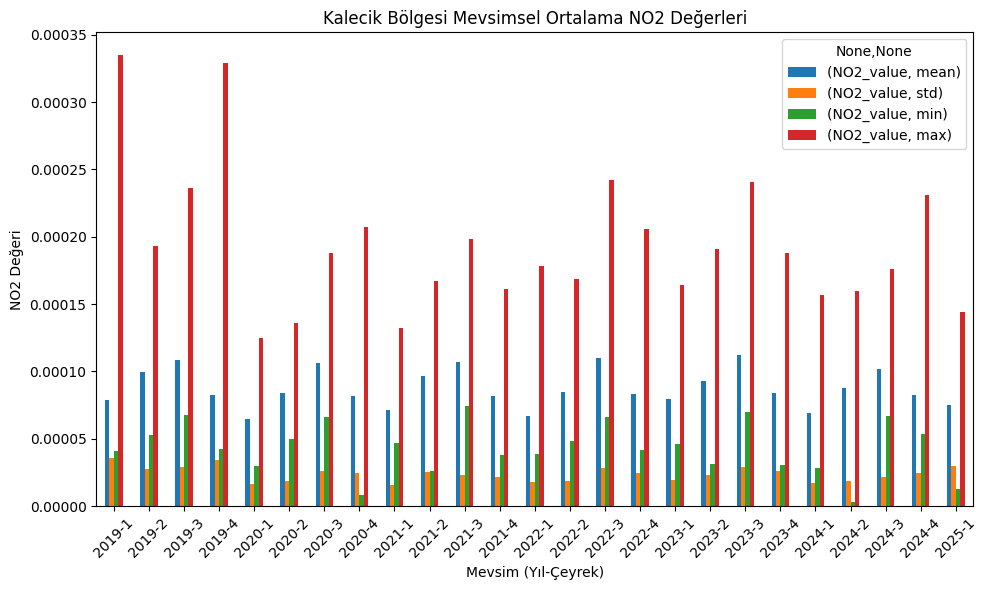


Kalecik Bölgesi Haftanın Günlerine Göre Ortalama NO2 Değerleri:
               NO2_value
Haftanın Günü           
Friday          0.000090
Tuesday         0.000089
Wednesday       0.000089
Thursday        0.000089
Saturday        0.000088
Monday          0.000088
Sunday          0.000086


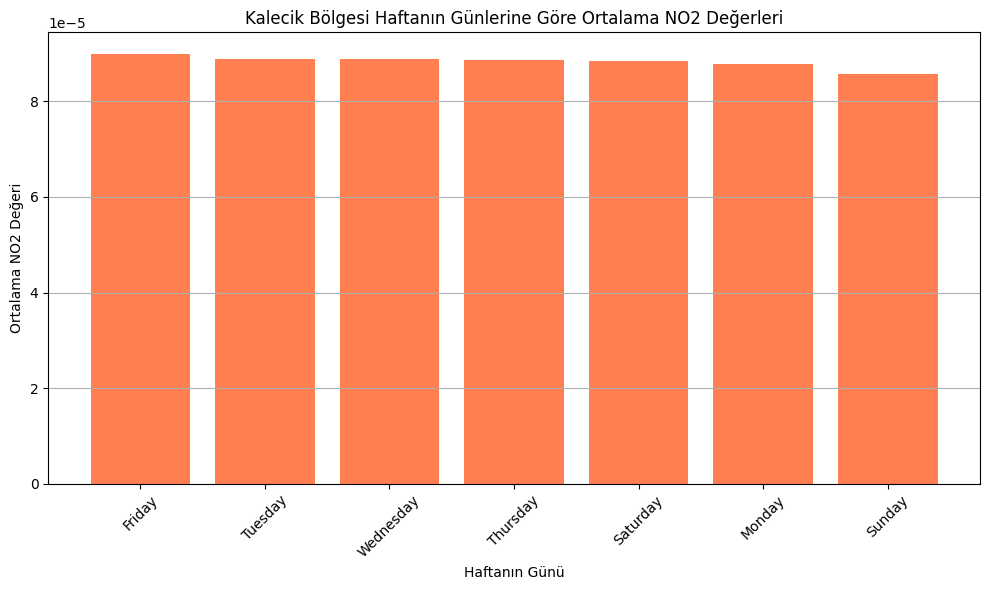


Kalecik Bölgesi Aykırı NO2 Değerleri (IQR yöntemi ile):
            NO2_value
date                 
2019-02-06   0.000335
2019-02-26   0.000235
2019-03-18   0.000163
2019-05-04   0.000170
2019-05-16   0.000161
...               ...
2024-09-07   0.000166
2024-09-25   0.000176
2024-10-05   0.000177
2024-12-16   0.000231
2025-01-05   0.000013

[99 rows x 1 columns]


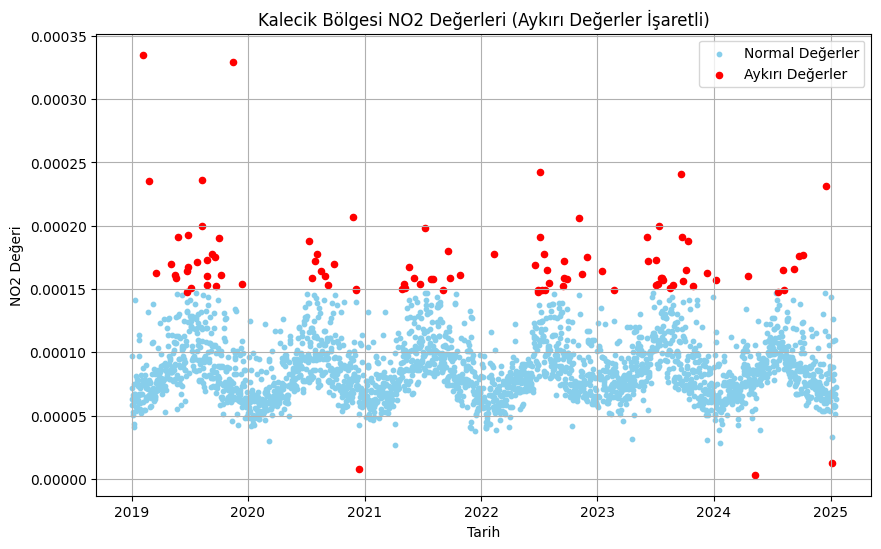

In [41]:
# Analiz Başlat
dosya_yolu = "Daily_NO2_Kalecik_2019_202501.csv"
bolge_adi = "Kalecik"
df = veriyi_yukle_ve_isle(dosya_yolu)

mevsimsel_analiz(df, bolge_adi)
haftanin_gunleri_analiz(df, bolge_adi)
aykiri_deger_analizi(df, bolge_adi)

## Karşılaştırmalı Analiz

### Yıllık ve Mevsimsel Karşılaştırmalı Analiz

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def veriyi_yukle_ve_isle(dosya_yolu):
    """Veriyi yükler, tarihe göre gruplayıp ortalama NO2 değerini hesaplar."""
    df = pd.read_csv(dosya_yolu)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    return df

def karsilastirmali_yillik_analiz(df_teknecik, df_kalecik):
    """Her iki bölgenin yıllık ortalama NO2 değerlerini karşılaştırır."""
    df_yillik_teknecik = df_teknecik.groupby(df_teknecik.index.year).mean()
    df_yillik_kalecik = df_kalecik.groupby(df_kalecik.index.year).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df_yillik_teknecik.index, df_yillik_teknecik['NO2_value'], marker='o', label='Teknecik')
    plt.plot(df_yillik_kalecik.index, df_yillik_kalecik['NO2_value'], marker='o', label='Kalecik')
    plt.title('Teknecik ve Kalecik Bölgeleri Yıllık Ortalama NO2 Değerleri Karşılaştırması')
    plt.xlabel('Yıl')
    plt.ylabel('Ortalama NO2 Değeri')
    plt.grid(True)
    plt.legend()
    plt.show()

def karsilastirmali_mevsimsel_analiz(df_teknecik, df_kalecik):
    """Her iki bölgenin mevsimsel ortalama NO2 değerlerini karşılaştırır."""
    df_mevsim_teknecik = df_teknecik.copy()
    df_mevsim_kalecik = df_kalecik.copy()

    df_mevsim_teknecik['Mevsim'] = df_mevsim_teknecik.index.to_period('Q').strftime('%Y-%q')
    df_mevsim_kalecik['Mevsim'] = df_mevsim_kalecik.index.to_period('Q').strftime('%Y-%q')

    df_mevsim_teknecik = df_mevsim_teknecik.groupby('Mevsim').mean()
    df_mevsim_kalecik = df_mevsim_kalecik.groupby('Mevsim').mean()

    plt.figure(figsize=(14, 7))
    plt.plot(df_mevsim_teknecik.index, df_mevsim_teknecik['NO2_value'], marker='o', label='Teknecik', linestyle='-')
    plt.plot(df_mevsim_kalecik.index, df_mevsim_kalecik['NO2_value'], marker='o', label='Kalecik', linestyle='--')
    plt.title('Teknecik ve Kalecik Bölgeleri Mevsimsel Ortalama NO2 Değerleri Karşılaştırması')
    plt.xlabel('Mevsim (Yıl-Çeyrek)')
    plt.ylabel('Ortalama NO2 Değeri')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

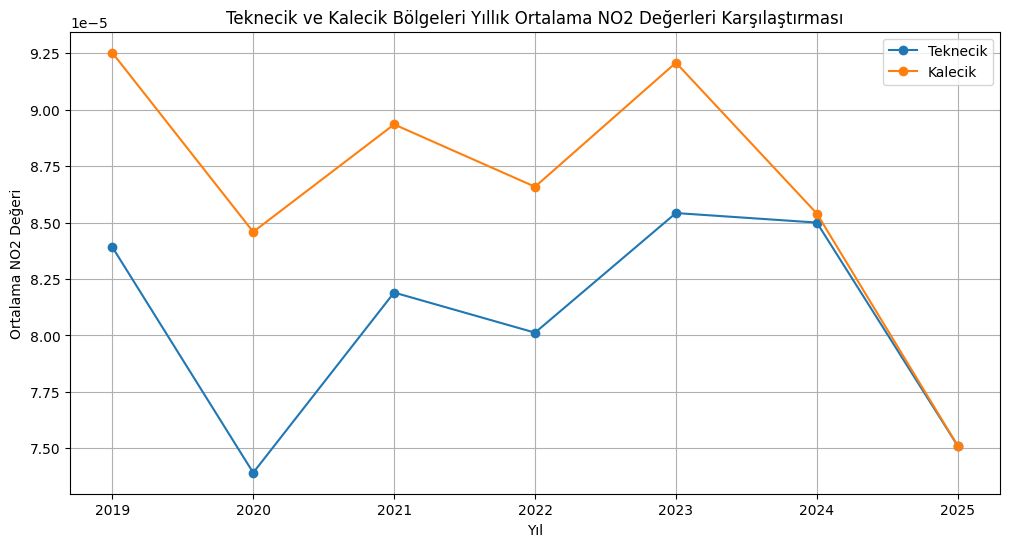

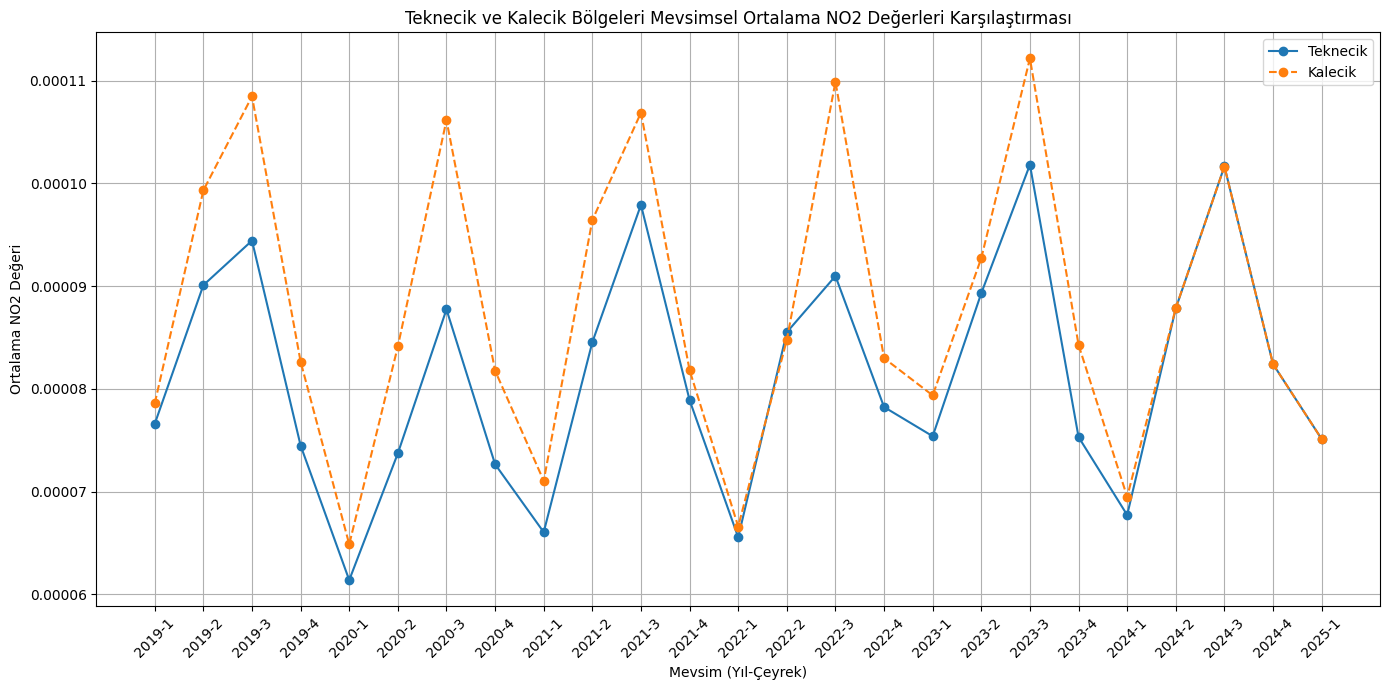

In [45]:
# Dosya yollarını tanımla
dosya_yolu_teknecik = "Daily_NO2_Teknecik_2019_202501.csv"
dosya_yolu_kalecik = "Daily_NO2_Kalecik_2019_202501.csv"

# Verileri yükle ve işle
df_teknecik = veriyi_yukle_ve_isle(dosya_yolu_teknecik)
df_kalecik = veriyi_yukle_ve_isle(dosya_yolu_kalecik)


# Karşılaştırmalı analizleri yap
karsilastirmali_yillik_analiz(df_teknecik, df_kalecik)
karsilastirmali_mevsimsel_analiz(df_teknecik, df_kalecik)

### Anomali Karşılaştırma

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def veriyi_yukle_ve_isle(dosya_yolu):
    """Veriyi yükler, tarihe göre gruplayıp ortalama NO2 değerini hesaplar."""
    df = pd.read_csv(dosya_yolu)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    return df

def aykiri_deger_analizi(df, bolge_adi):
    """Aykırı değerleri tespit eder ve gösterir."""
    q1 = df['NO2_value'].quantile(0.25)
    q3 = df['NO2_value'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    aykiri_degerler = df[(df['NO2_value'] < lower_bound) | (df['NO2_value'] > upper_bound)]

    print(f'\n{bolge_adi} Bölgesi Aykırı NO2 Değerleri (IQR yöntemi ile):')
    print(aykiri_degerler)

    return aykiri_degerler, lower_bound, upper_bound

def karsilastirmali_aykiri_deger_analizi(df_teknecik, df_kalecik):
    """Her iki bölgenin aykırı değerlerini karşılaştırır."""

    aykiri_teknecik, lower_teknecik, upper_teknecik = aykiri_deger_analizi(df_teknecik, "Teknecik")
    aykiri_kalecik, lower_kalecik, upper_kalecik = aykiri_deger_analizi(df_kalecik, "Kalecik")

    aykiri_teknecik_sayisi = len(aykiri_teknecik)
    aykiri_kalecik_sayisi = len(aykiri_kalecik)

    print(f"\nTeknecik Bölgesi Aykırı Değer Sayısı: {aykiri_teknecik_sayisi}")
    print(f"Kalecik Bölgesi Aykırı Değer Sayısı: {aykiri_kalecik_sayisi}")

    plt.figure(figsize=(14,7))
    plt.scatter(df_teknecik.index, df_teknecik['NO2_value'], label='Teknecik (Normal Değerler)', s=10, color = "skyblue")
    plt.scatter(aykiri_teknecik.index, aykiri_teknecik['NO2_value'], label='Teknecik (Aykırı Değerler)', color='red', s=20)

    plt.scatter(df_kalecik.index, df_kalecik['NO2_value'], label='Kalecik (Normal Değerler)', s=10, color = "lightgreen")
    plt.scatter(aykiri_kalecik.index, aykiri_kalecik['NO2_value'], label='Kalecik (Aykırı Değerler)', color='purple', s=20)

    plt.title('Teknecik ve Kalecik Bölgeleri NO2 Değerleri (Aykırı Değerler İşaretli)')
    plt.xlabel('Tarih')
    plt.ylabel('NO2 Değeri')
    plt.legend()
    plt.grid(True)
    plt.show()


Teknecik Bölgesi Aykırı NO2 Değerleri (IQR yöntemi ile):
            NO2_value
date                 
2019-02-06   0.000354
2019-02-06   0.000278
2019-07-30   0.000153
2019-11-14   0.000132
2019-11-15   0.000144
2020-04-15   0.000018
2020-12-04   0.000153
2020-12-04   0.000145
2020-12-05   0.000142
2021-07-02   0.000132
2021-07-17   0.000133
2021-08-04   0.000137
2021-08-24   0.000143
2021-08-25   0.000167
2021-12-14   0.000169
2021-12-15   0.000133
2021-12-30   0.000165
2022-02-17   0.000029
2022-12-06   0.000133
2023-04-29   0.000168
2023-05-17   0.000133
2023-06-08   0.000001
2023-07-03   0.000144
2023-07-18   0.000135
2023-07-20   0.000155
2023-07-29   0.000153
2023-07-31   0.000142
2023-08-30   0.000141
2023-09-25   0.000140
2023-09-26   0.000163
2023-12-11   0.000180
2024-04-11   0.000134
2024-04-16   0.000160
2024-05-10   0.000003
2024-07-15   0.000147
2024-07-16   0.000141
2024-07-17   0.000134
2024-07-21   0.000148
2024-07-22   0.000137
2024-08-06   0.000165
2024-08-07   0.000

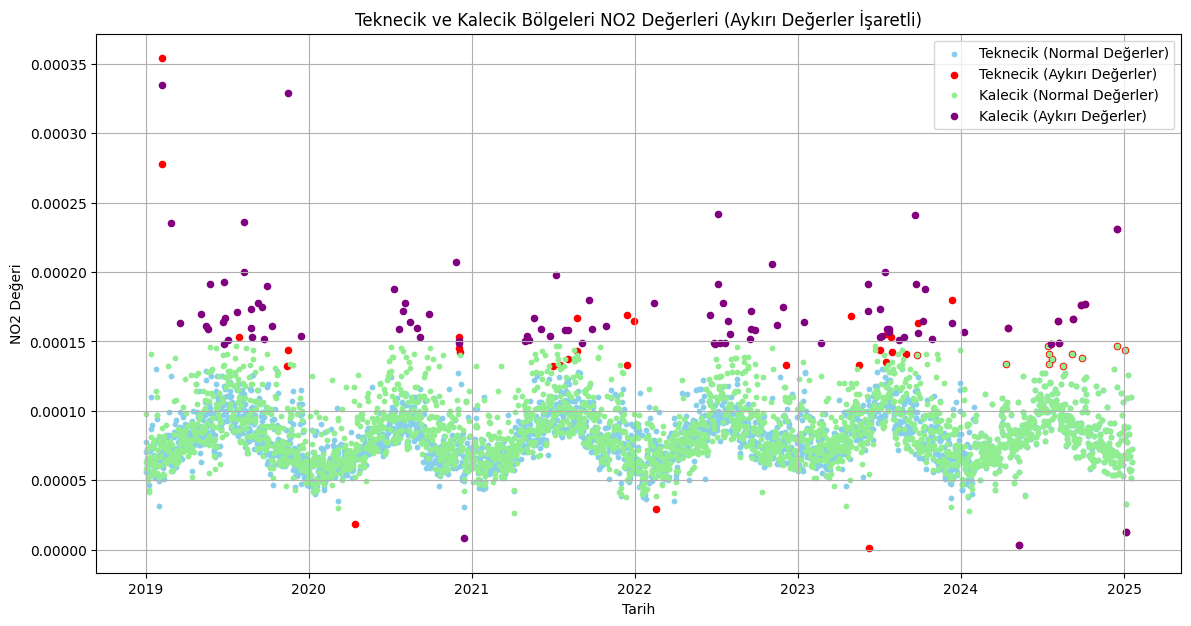

In [48]:
# Dosya yollarını tanımla
dosya_yolu_teknecik = "Daily_NO2_Teknecik_2019_202501.csv"
dosya_yolu_kalecik = "Daily_NO2_Kalecik_2019_202501.csv"

# Verileri yükle ve işle
df_teknecik = veriyi_yukle_ve_isle(dosya_yolu_teknecik)
df_kalecik = veriyi_yukle_ve_isle(dosya_yolu_kalecik)

karsilastirmali_aykiri_deger_analizi(df_teknecik, df_kalecik)